**Simple Time Series Model**

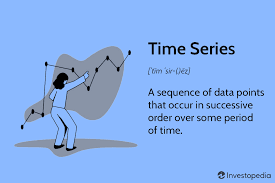

**Step 1: Import Required Libraries**

The code begins by importing essential libraries for time series analysis:

* pandas and numpy for data manipulation

* matplotlib and seaborn for visualization

* statsmodels for statistical time series analysis (decomposition, stationarity tests, autocorrelation)

* sklearn for model evaluation metrics

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Set plotting style
plt.style.use('seaborn-v0_8')

**Step 2: Create Sample Time Series Data**

The code generates a synthetic time series dataset with:

* A clear upward linear trend

* Annual seasonality (using a sine wave)

* Random noise component

This approach allows for demonstrating time series concepts without needing external data sources.

In [2]:
# Create a date range
date_rng = pd.date_range(start='2018-01-01', end='2022-12-31', freq='D')

# Create a time series with trend, seasonality, and noise
np.random.seed(42)
trend = np.linspace(0, 50, len(date_rng))
seasonality = 10 * np.sin(2 * np.pi * np.arange(len(date_rng)) / 365)
noise = np.random.normal(0, 2, len(date_rng))

# Combine components
values = trend + seasonality + noise

# Create DataFrame
df = pd.DataFrame({
    'date': date_rng,
    'value': values
})

# Set date as index
df.set_index('date', inplace=True)

# Display first few rows
print("Sample Time Series Data:")
print(df.head())

Sample Time Series Data:
               value
date                
2018-01-01  0.993428
2018-01-02 -0.076998
2018-01-03  1.694388
2018-01-04  3.644448
2018-01-05  0.329307


**Step 3: Visualize the Time Series**

A line plot displays the complete time series, showing the combination of trend, seasonality, and noise components.

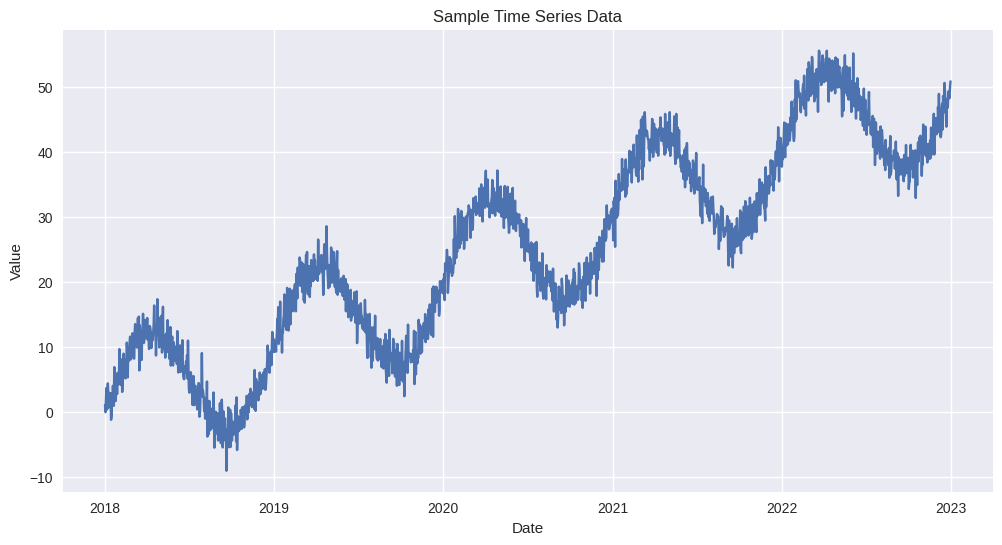

In [3]:
# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['value'])
plt.title('Sample Time Series Data')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.show()

**Step 4: Decompose the Time Series**

Using the *seasonal_decompose* function, the code breaks down the time series into:

* Observed data (original series)

* Trend component (long-term direction)

* Seasonal component (repeating patterns)

* Residual component (random noise after removing trend and seasonality)







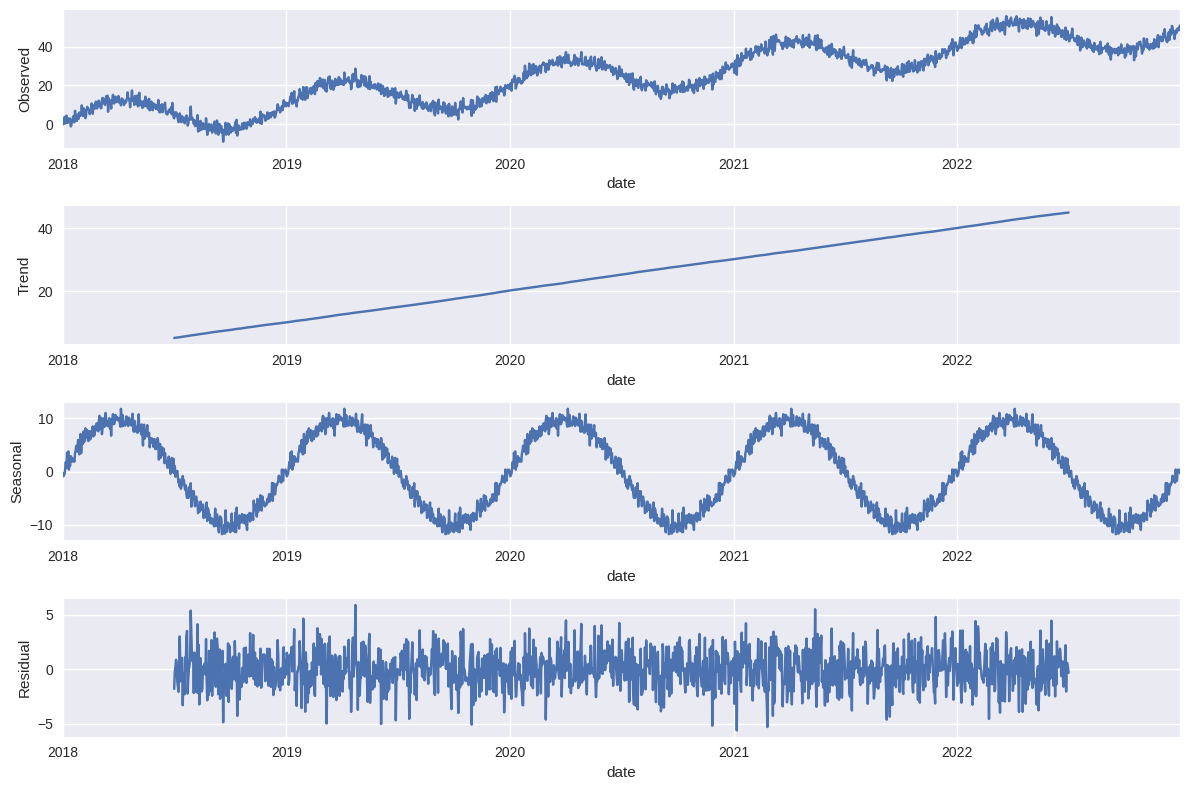

In [4]:
# Decompose the time series
decomposition = seasonal_decompose(df['value'], model='additive', period=365)

# Plot decomposition
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))
decomposition.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
decomposition.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
decomposition.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
decomposition.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

**Step 5: Check for Stationarity**


The Augmented Dickey-Fuller test checks if the time series is stationary (statistical properties don't change over time), which is a key assumption for many time series models.

In [5]:
# Augmented Dickey-Fuller test for stationarity
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4],
                         index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

# Perform ADF test
adf_test(df['value'])

Results of Dickey-Fuller Test:
Test Statistic                   -1.101781
p-value                           0.714361
#Lags Used                       24.000000
Number of Observations Used    1801.000000
Critical Value (1%)              -3.433986
Critical Value (5%)              -2.863146
Critical Value (10%)             -2.567625
dtype: float64


**Step 6: Plot ACF and PACF**

ACF (Autocorrelation Function) and PACF (Partial Autocorrelation Function) plots help identify:

* The strength of relationship between observations at different time lags

* Potential parameters for ARIMA models

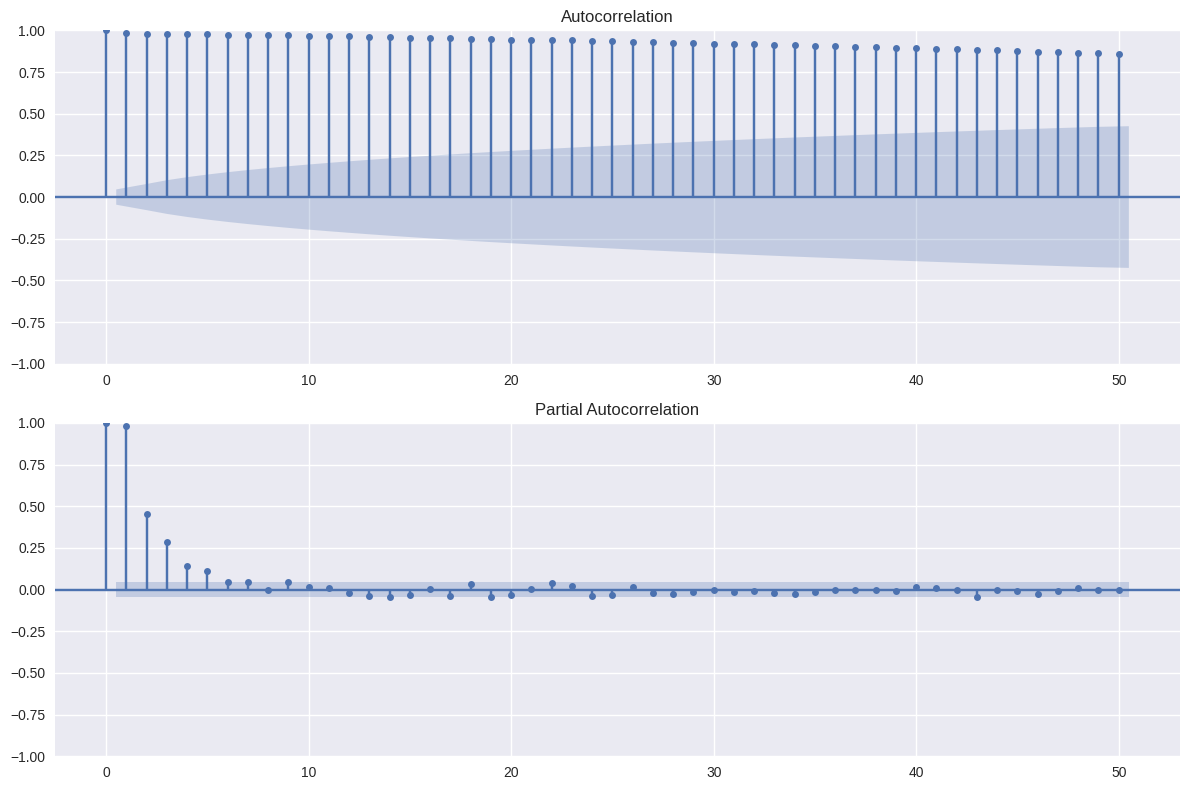

In [6]:
# Plot Autocorrelation and Partial Autocorrelation
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(df['value'], lags=50, ax=ax1)
plot_pacf(df['value'], lags=50, ax=ax2)
plt.tight_layout()
plt.show()

**Step 7: Split Data into Train and Test Sets**

The data is divided into training (80%) and testing (20%) sets to evaluate model performance properly.


Train size: 1460
Test size: 366


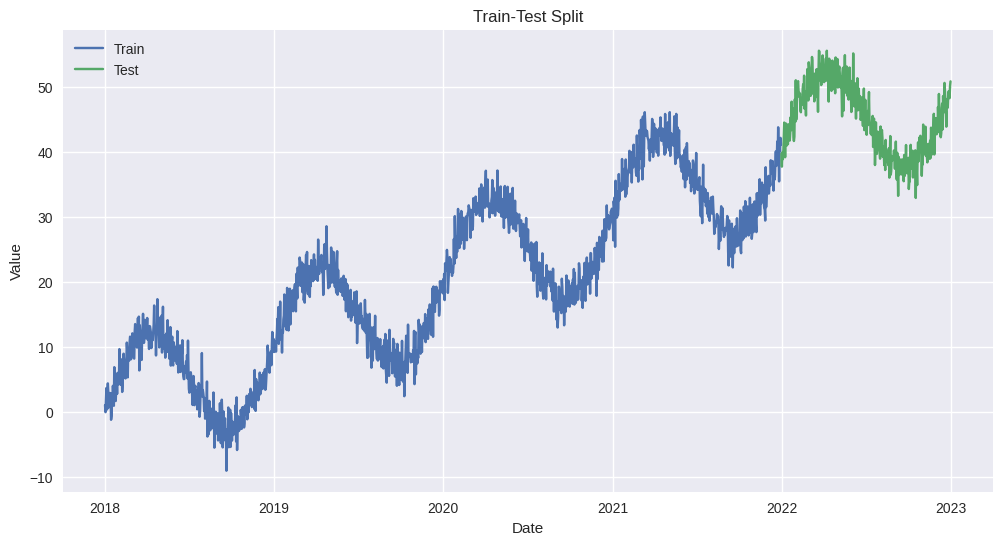

In [7]:
# Split the data (80% train, 20% test)
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]

print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")

# Plot train and test sets
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index, test['value'], label='Test')
plt.title('Train-Test Split')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

**Step 8: Simple Forecasting with Moving Average**

A simple moving average model is implemented as a baseline forecasting approach, with performance metrics calculated (MSE, RMSE, MAE).

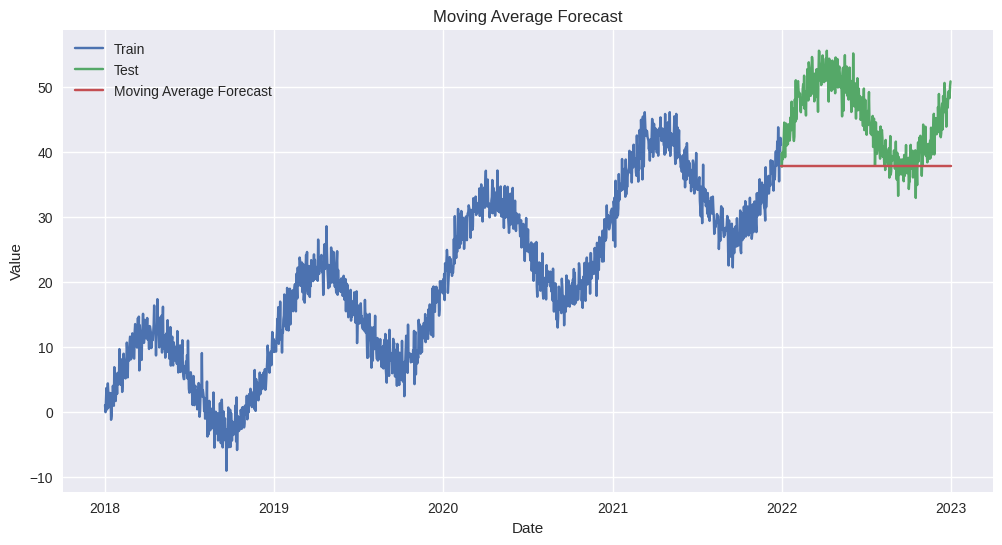

Mean Squared Error (MSE): 81.65
Root Mean Squared Error (RMSE): 9.04
Mean Absolute Error (MAE): 7.50


In [8]:
# Calculate moving average
window_size = 30
moving_avg = train['value'].rolling(window=window_size).mean()

# Forecast using moving average
last_moving_avg = moving_avg.iloc[-1]
moving_avg_forecast = pd.Series([last_moving_avg] * len(test), index=test.index)

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['value'], label='Train')
plt.plot(test.index, test['value'], label='Test')
plt.plot(test.index, moving_avg_forecast, label='Moving Average Forecast')
plt.title('Moving Average Forecast')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# Calculate metrics
mse = mean_squared_error(test['value'], moving_avg_forecast)
mae = mean_absolute_error(test['value'], moving_avg_forecast)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")

**Step 9: SARIMA Model**

A simple moving average model is implemented as a baseline forecasting approach, with performance metrics calculated (MSE, RMSE, MAE).


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


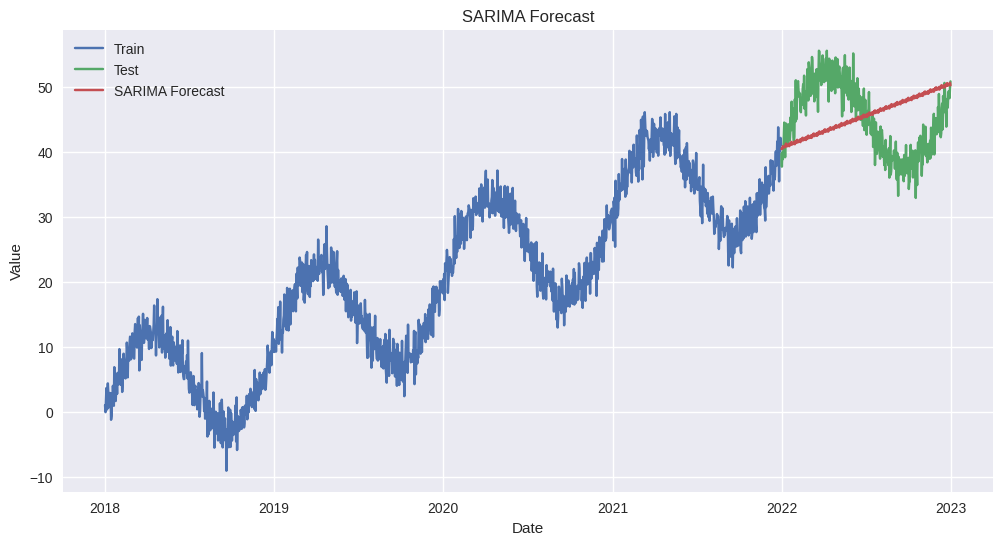

SARIMA Model Performance:
Mean Squared Error (MSE): 52.46
Root Mean Squared Error (RMSE): 7.24
Mean Absolute Error (MAE): 6.40


In [9]:
# Note: This step may take some time to run

# Install statsmodels if not already installed
!pip install statsmodels

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (using simplified parameters)
try:
    model = SARIMAX(train['value'],
                   order=(1, 1, 1),
                   seasonal_order=(1, 1, 1, 12))
    model_fit = model.fit(disp=False)

    # Forecast
    sarima_forecast = model_fit.forecast(steps=len(test))

    # Plot results
    plt.figure(figsize=(12, 6))
    plt.plot(train.index, train['value'], label='Train')
    plt.plot(test.index, test['value'], label='Test')
    plt.plot(test.index, sarima_forecast, label='SARIMA Forecast')
    plt.title('SARIMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Calculate metrics
    mse = mean_squared_error(test['value'], sarima_forecast)
    mae = mean_absolute_error(test['value'], sarima_forecast)
    rmse = np.sqrt(mse)

    print(f"SARIMA Model Performance:")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")

except Exception as e:
    print(f"Error fitting SARIMA model: {e}")
    print("This is expected in some Colab environments due to computational constraints")

**Summary and Next Steps**

The code concludes with a summary of the analysis performed and suggestions for further exploration.

This example provides a complete workflow for time series analysis, from data creation through visualization, decomposition, statistical testing, and modeling with performance evaluation. The code is designed to run entirely in Google Colab without external dependencies.

In [10]:
print("Time Series Analysis Summary:")
print("1. Created a synthetic time series with trend, seasonality, and noise")
print("2. Visualized the data and its components")
print("3. Checked for stationarity using the ADF test")
print("4. Analyzed autocorrelation with ACF and PACF plots")
print("5. Split data into training and testing sets")
print("6. Implemented a simple moving average forecast")
print("7. (Optional) Implemented a SARIMA model")

print("\nNext steps could include:")
print("- Trying different forecasting models (Exponential Smoothing, Prophet, etc.)")
print("- Hyperparameter tuning for the models")
print("- Incorporating external variables")
print("- Implementing more advanced deep learning models (LSTM, etc.)")

Time Series Analysis Summary:
1. Created a synthetic time series with trend, seasonality, and noise
2. Visualized the data and its components
3. Checked for stationarity using the ADF test
4. Analyzed autocorrelation with ACF and PACF plots
5. Split data into training and testing sets
6. Implemented a simple moving average forecast
7. (Optional) Implemented a SARIMA model

Next steps could include:
- Trying different forecasting models (Exponential Smoothing, Prophet, etc.)
- Hyperparameter tuning for the models
- Incorporating external variables
- Implementing more advanced deep learning models (LSTM, etc.)
